
*  **Name: AmirHossein Mohammadi**
*  **Std number: 99201081**


# Import Library

In [6]:
import torch
from torchvision import transforms
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np
import pandas as pds
from torch.utils.data import DataLoader,TensorDataset,random_split
from tqdm.auto import tqdm
from IPython import display
from sklearn.metrics import accuracy_score
import random

# Load Data with data loader

In [13]:
n = 3762
image=[]
cw = os.getcwd().replace(os.sep, '/')
trans = transforms.Compose([transforms.ToTensor()])
for i in range(n):
    image.append(np.array(Image.open(cw+"/Tumor/Brain_Tumor/Image" + str(i+1) + ".jpg").resize((48,48))))

temp = pds.read_csv(cw+"/Tumor/Brain_Tumor.csv",index_col=None, header=None).to_numpy()

temp = temp[1:,1]
targets = np.zeros((n,1),dtype=int)
targets = []
for i in range(n):
    targets.append(int(temp[i]))

data = np.array(image)
data = data/255
tem_dataset=data
data = torch.from_numpy(data).permute((0,3,2,1))
data = data.float()
label=targets
targets = torch.tensor(targets)
dataset = TensorDataset(data,targets)
batch_size = 4
val_size = int(np.ceil(len(dataset)*0.2))
train_size = len(dataset) - val_size 

train_data,test_data = random_split(dataset,[train_size,val_size])
train_loader = DataLoader(train_data,batch_size = batch_size,shuffle=True)
test_loader = DataLoader(test_data,batch_size = batch_size,shuffle=True)


# Data Specification

In [14]:
print("DataSet Dimention:")
print(list(dataset[0][0].shape))
print("Dataset Size:")
print(len(dataset))
print("Num_classes:")
print(len({i:label.count(i) for i in label}))
print("Class Info:")
print({i:label.count(i) for i in label})
print("Train data size:")
print(train_size)
print("Validation data size:")
print(val_size)
print("Features Type:")
print(type(dataset[1]))
print(type(dataset[1][1]))
print("Class Type:")
print(type(targets[1]))


DataSet Dimention:
[3, 48, 48]
Dataset Size:
3762
Num_classes:
2
Class Info:
{0: 2079, 1: 1683}
Train data size:
3009
Validation data size:
753
Features Type:
<class 'tuple'>
<class 'torch.Tensor'>
Class Type:
<class 'torch.Tensor'>


# Visualization

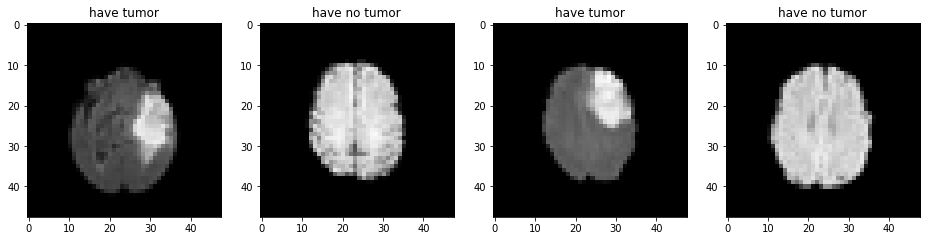

In [15]:
rand_list=random.sample(range(0, 3762), 4)
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(140 + 1 + (i))
    plt.imshow(tem_dataset[rand_list[i]])
    if (label[rand_list[i]]==1):
        plt.title('have tumor')
    if (label[rand_list[i]]==0):
        plt.title('have no tumor')
plt.show()

# Use CPU OR GPU

In [16]:
if torch.cuda.is_available():
     dev=cuda0 = torch.device('cuda:0')
else:
    dev=cuda0 = torch.device('cpu')
print("Print Available: "+str(dev))

Print Available: cuda:0


# Create Helper Class for Training, Testing and Plot Loss Phase

In [28]:
class Helper_FC_CNN:
        
    def Train_FC_CNN(self, model, train_loader, test_loader, opt, epch):
        print("Training Phase is Starting:")
        test_acc=[]
        loss_train_all = []
        loss_test_all=[]
        
        for i in range(1, epch+1):
            loss_train_single = []
            model.train()
            print("******************Epoch("+str(i)+"):***********************")
            temp=1
            for X_features, label in train_loader:        
                X_features, label = X_features.to(dev), label.to(dev)        
                optimizer.zero_grad()
                outputs = model(X_features)
                loss = model.get_loss(outputs, label)
                loss.backward()
                optimizer.step()
                loss_train_single.append(loss.item())
                print("Batch "+str(temp))
                print("Loss for Batch("+str(temp)+"): "+str(loss.item()))
                temp=temp+1
            loss_train_all.append(np.mean(loss_train_single))
            print("Avg Loss for "+str(temp)+" Batches"+str(np.mean(loss_train_single)))
            print("Epoch("+str(i)+") Finished")
            tmp_tst_loss, tmp_tst_acc=self.Test_FC_CNN(model,test_loader)
            loss_test_all.append(tmp_tst_loss)
            test_acc.append(tmp_tst_acc)
            
        return loss_train_all, loss_test_all, test_acc
        
    def plot_loss(self, loss_train_all,status,epch):
        plt.title(status)
        plt.plot(range(1, epch+1), loss_train_all)
        plt.ylabel(status)
        plt.xlabel('Epochs')
        plt.show()
        
        
    def Test_FC_CNN(self, model, data_loader):
        y_true, y_pred = [], []
        test_loss=[]
        with torch.no_grad():                
            for X_features, label in data_loader:         
                X_features, label = X_features.to(dev), label.to(dev)
                outputs = model(X_features)
                loss = model.get_loss(outputs, label)
                test_loss.append(loss.item())
                outputs = outputs.detach().cpu().numpy()
                y_true += label.detach().cpu().numpy().tolist()
                y_pred += np.argmax(outputs, axis=-1).tolist()
        print("**********************************************")
        print("Avg Test Loss:")
        print(np.mean(test_loss))
        print("Test Accuracy:")
        print(accuracy_score(y_true, y_pred))
        print("**********************************************")
        return np.mean(test_loss), accuracy_score(y_true, y_pred)

        
    

# Define Linear Model

In [18]:
class FullyConnectedNN(nn.Module):
    def __init__(self):
            super(FullyConnectedNN, self).__init__()
            
            self.Fully_Connected_layers=nn.Sequential(
            nn.Flatten(),
            nn.Linear(3*48*48,512),
            nn.ReLU(),
            nn.Linear(512,4),
            nn.ReLU(),
            nn.Linear(4,2)
            )
            self.cross_entropy = nn.CrossEntropyLoss()
            
    def forward(self, x):
        y_pred=self.Fully_Connected_layers(x)
        return y_pred

    def get_loss(self, y_pred, y_true):
        loss=self.cross_entropy(y_pred,y_true)
        return loss
            

# Print Model Architecture

In [20]:
Linear_model=FullyConnectedNN()
Linear_model.to(dev)
print("Model Architecture is:")
print(Linear_model)

Model Architecture is:
FullyConnectedNN(
  (Fully_Connected_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6912, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=4, bias=True)
    (4): ReLU()
    (5): Linear(in_features=4, out_features=2, bias=True)
  )
  (cross_entropy): CrossEntropyLoss()
)


# Define Optimizer

In [25]:
optimizer = torch.optim.SGD(Linear_model.parameters(), lr=0.001)

# Create Object from Helper function

In [29]:
linear_helper_model=Helper_FC_CNN()

# Training Phase

In [27]:
train_loss, test_loss, test_acc=linear_helper_model.Train_FC_CNN(Linear_model, train_loader,test_loader, optimizer, 100)

Streaming output truncated to the last 5000 lines.
Loss for Batch(530): 0.00385101861320436
Batch 531
Loss for Batch(531): 0.00010340268636355177
Batch 532
Loss for Batch(532): 0.10590080916881561
Batch 533
Loss for Batch(533): 0.009981103241443634
Batch 534
Loss for Batch(534): 0.32089582085609436
Batch 535
Loss for Batch(535): 0.0005111240316182375
Batch 536
Loss for Batch(536): 0.033118490129709244
Batch 537
Loss for Batch(537): 0.02423308603465557
Batch 538
Loss for Batch(538): 0.0264107845723629
Batch 539
Loss for Batch(539): 4.213734428049065e-05
Batch 540
Loss for Batch(540): 0.32179200649261475
Batch 541
Loss for Batch(541): 0.0005197392893023789
Batch 542
Loss for Batch(542): 0.013696352019906044
Batch 543
Loss for Batch(543): 0.594851016998291
Batch 544
Loss for Batch(544): 0.0035746432840824127
Batch 545
Loss for Batch(545): 0.13443243503570557
Batch 546
Loss for Batch(546): 0.03767078369855881
Batch 547
Loss for Batch(547): 0.002553864847868681
Batch 548
Loss for Batch(548)

# Plot Training Loss

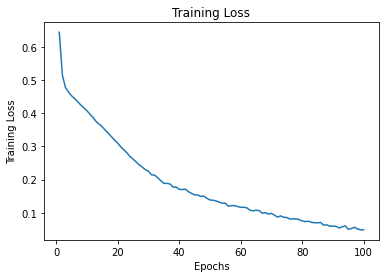

In [30]:
linear_helper_model.plot_loss(train_loss,"Training Loss",100)

# Plot Testing Loss

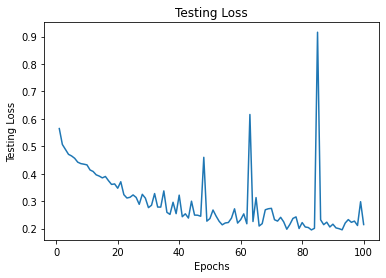

In [32]:
linear_helper_model.plot_loss(test_loss,"Testing Loss",100)

# Plot Accuracy

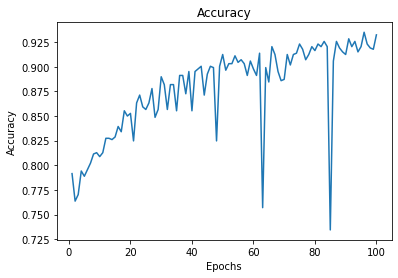

In [33]:
linear_helper_model.plot_loss(test_acc,"Accuracy",100)

# Define CNN Model

In [34]:
class CNN(nn.Module):
    def __init__(self):
            super(CNN, self).__init__()
            self.CNN_layers=nn.Sequential(
            nn.Conv2d(3, 32,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),    
            nn.Flatten(),
            nn.Linear(36864,512),
            nn.ReLU(),
            nn.Linear(512,4),
            nn.ReLU(),
            nn.Linear(4,2)
            )
            self.cross_entropy = nn.CrossEntropyLoss()
            
    def forward(self, x):
        y_pred=self.CNN_layers(x)
        return y_pred

    def get_loss(self, y_pred, y_true):
        loss=self.cross_entropy(y_pred,y_true)
        return loss
            

# Print Model Architecture

In [35]:
CNN_model=CNN()
CNN_model.to(dev)
print("CNN Architecture is:")
print(CNN_model)

CNN Architecture is:
CNN(
  (CNN_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=36864, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=4, bias=True)
    (9): ReLU()
    (10): Linear(in_features=4, out_features=2, bias=True)
  )
  (cross_entropy): CrossEntropyLoss()
)


# Optimizer

In [36]:
optimizer = torch.optim.SGD(CNN_model.parameters(), lr=0.001)

# Define Helper function for CNN

In [37]:
CNN_helper_model=Helper_FC_CNN()

# Training Phase

In [39]:
train_loss, test_loss, test_acc=CNN_helper_model.Train_FC_CNN(CNN_model, train_loader,test_loader, optimizer, 100)

Streaming output truncated to the last 5000 lines.
Loss for Batch(530): 0.0009846335742622614
Batch 531
Loss for Batch(531): 0.0001436028687749058
Batch 532
Loss for Batch(532): 0.000330987386405468
Batch 533
Loss for Batch(533): 0.009285702370107174
Batch 534
Loss for Batch(534): 0.003569025080651045
Batch 535
Loss for Batch(535): 7.908603583928198e-05
Batch 536
Loss for Batch(536): 2.3602726287208498e-05
Batch 537
Loss for Batch(537): 0.002848248230293393
Batch 538
Loss for Batch(538): 0.0035547472070902586
Batch 539
Loss for Batch(539): 9.717779903439805e-05
Batch 540
Loss for Batch(540): 0.0004546456038951874
Batch 541
Loss for Batch(541): 0.015823468565940857
Batch 542
Loss for Batch(542): 0.04049414396286011
Batch 543
Loss for Batch(543): 0.0004077558405697346
Batch 544
Loss for Batch(544): 0.008921491913497448
Batch 545
Loss for Batch(545): 0.0946728065609932
Batch 546
Loss for Batch(546): 5.9988808061461896e-05
Batch 547
Loss for Batch(547): 0.0005274649010971189
Batch 548
Loss

# Plot Training Loss

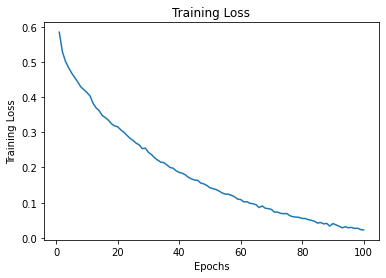

In [40]:
CNN_helper_model.plot_loss(train_loss,"Training Loss",100)

# Plot Testing Loss

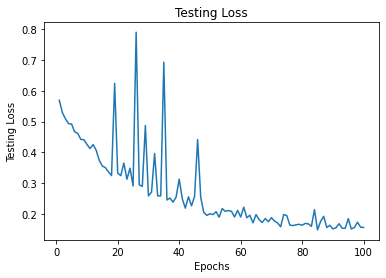

In [42]:
CNN_helper_model.plot_loss(test_loss,"Testing Loss",100)

# Plot Accuracy

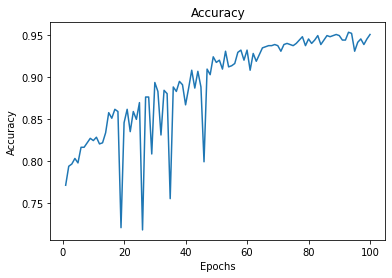

In [43]:
CNN_helper_model.plot_loss(test_acc,"Accuracy",100)

<div dir="rtl">
همانطور که از نتایج مشخص است شبکه ی کانوولوشنی نتایج بهتری از شبکه ی کاملا متصب گرفته است. مثلا در دقت شبکه ی کانوولوشنی به دقت 95 درصد و شبکه ی کاملا متصل به دقت 93 درصد رسیده است. همانطور که در نمودار دقت و تابع هزینه مشخص است شبکه ی کاملا متصل در آموزش خود بسیار نوسان دارد و این مسئله به خاطر این است که تمامی داده های به یک نورون متصل هستند نه داده های مرتبط و این مسئله می تواند در دقت و تایع هزینه ما تاثیر گذار باشد از طرفی همانطور که در شبکه ی کانوولوشنی دیده می شود این شبکه در ابتدای آموزش نوساناتی دارد اما رفته رفته دقت و تابع هزینه هموار تر می شود این مسئله به این خاطر است که چون تمامی داده ها به یک نورون متصل نیستند در ابتدای آموزش شبکه در حال تجربه و آزمون است و پس از چند بار آموزش مسیر هموار می شود.و این مسئله به خاطر مسائلی از جمله استخراج خوب ویژگی ها، parameter sharing ،  Sparse & local interactions ,  Equi-variant  شبکه های کانوولونشی است. 
</dir>